RESEARCH QUESTIONS

How have crashes changed from 1908–2024?

Which countries/regions have the most crashes?

Which aircraft manufacturers are most involved in crashes?

How do fatalities compare over the years?

What percentage of people survived per crash?

In [1]:
import pandas as pd



In [2]:
df = pd.read_csv("datasets/aircrahesFullDataUpdated_2024.csv")
df.head()


,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1970,Qtr 2,April,28,NaN,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,NaN,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,NaN,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12


In [3]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   5035 non-null   int64 
 1   Quarter                5035 non-null   object
 2   Month                  5035 non-null   object
 3   Day                    5035 non-null   int64 
 4   Country/Region         4805 non-null   object
 5   Aircraft Manufacturer  5035 non-null   object
 6   Aircraft               5035 non-null   object
 7   Location               5035 non-null   object
 8   Operator               4801 non-null   object
 9   Ground                 5035 non-null   int64 
 10  Fatalities (air)       5035 non-null   int64 
 11  Aboard                 5035 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 472.2+ KB


Year                       0
Quarter                    0
Month                      0
Day                        0
Country/Region           230
Aircraft Manufacturer      0
Aircraft                   0
Location                   0
Operator                 234
Ground                     0
Fatalities (air)           0
Aboard                     0
dtype: int64

In [11]:
print(df.columns.tolist())

['Year', 'Quarter', 'Month', 'Day', 'Country/Region', 'Aircraft Manufacturer', 'Aircraft', 'Location', 'Operator', 'Ground', 'Fatalities (air)', 'Aboard']


In [12]:
# Convert Year, Month, Day to numeric
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Month"] = pd.to_numeric(df["Month"], errors="coerce")
df["Day"] = pd.to_numeric(df["Day"], errors="coerce")


In [13]:
# Build a single Date column
df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]], errors="coerce")

In [14]:
# Fill missing fatalities
df["Fatalities (air)"] = df["Fatalities (air)"].fillna(0)

EDA

In [40]:
# Crashes per year
crashes_per_year = df.groupby("Year").size()

# Top countries with most crashes
crashes_by_country = df["Country/Region"].value_counts().head(10)

# Top aircraft manufacturers
top_manufacturers = df["Aircraft Manufacturer"].value_counts().head(10)

# Fatalities per year
fatalities_per_year = df.groupby("Year")["Fatalities (air)"].sum()

# Percentage of survivors per crash
df["Survivors"] = df["Aboard"] - df["Fatalities (air)"]
df["Survival Rate"] = df["Survivors"] / df["Aboard"]


VISUALIZATION

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns



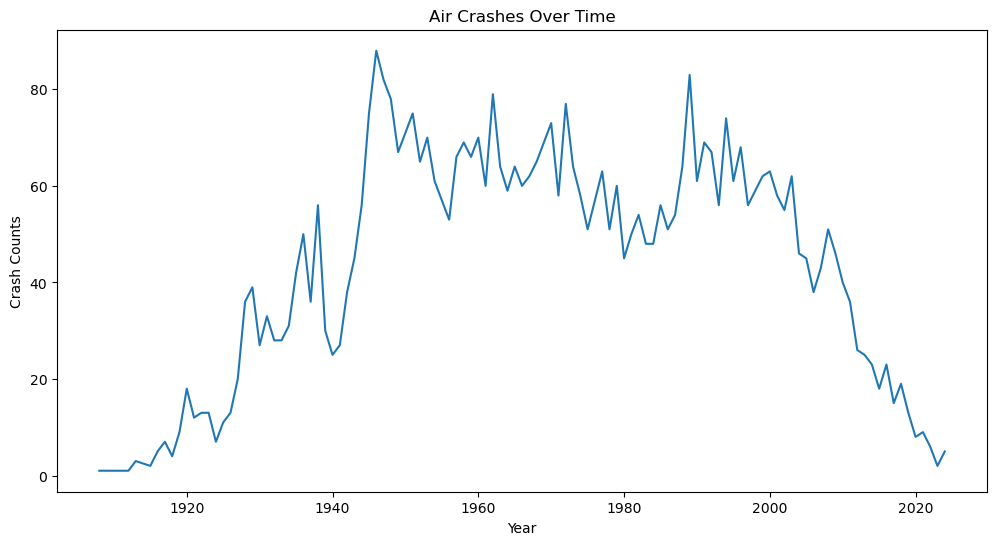

In [24]:
# Crashes over time
plt.figure(figsize=(12,6))
plt.plot(crashes_per_year.index, crashes_per_year.values) 
plt.title("Air Crashes Over Time")
plt.xlabel("Year")
plt.ylabel("Crash Counts")
plt.show()



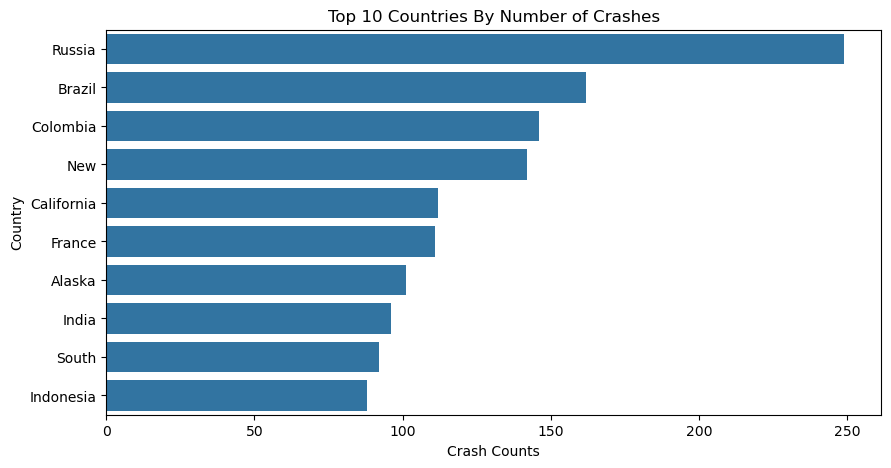

In [32]:
# Top 10 countries with most crashes

plt.figure(figsize=(10,5))
sns.barplot(x=crashes_by_country.values, y=crashes_by_country.index)
plt.title("Top 10 Countries By Number of Crashes")
plt.xlabel("Crash Counts")
plt.ylabel("Country")
plt.show()


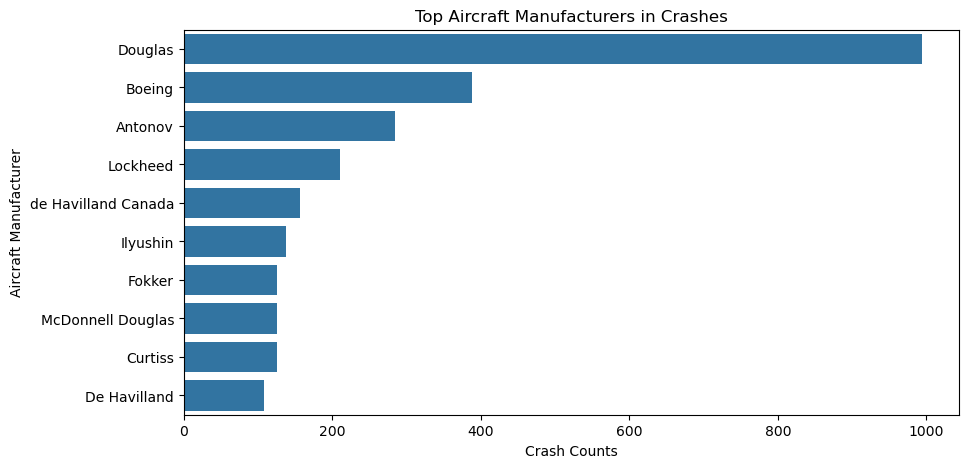

In [33]:
# Top aircraft manufacturers

plt.figure(figsize=(10,5))
sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index)
plt.title("Top Aircraft Manufacturers in Crashes")
plt.xlabel("Crash Counts")
plt.ylabel("Aircraft Manufacturer")
plt.show()


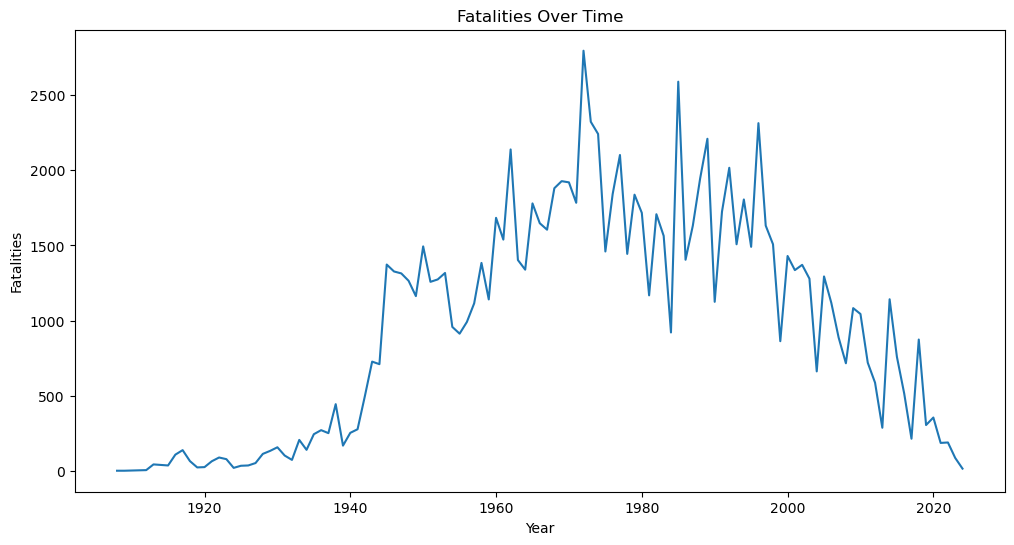

In [36]:
# Fatalities over time

plt.figure(figsize=(12,6))
plt.plot(fatalities_per_year.index, fatalities_per_year.values) 
plt.title("Fatalities Over Time")
plt.xlabel("Year")
plt.ylabel("Fatalities")
plt.show()


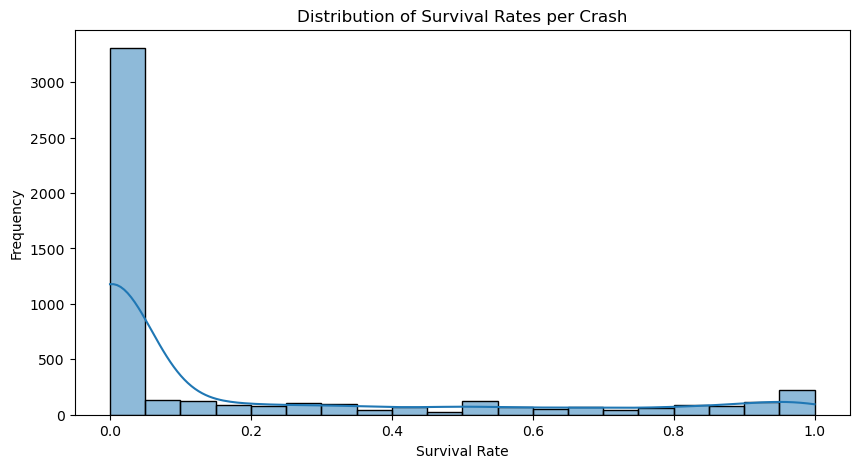

In [39]:
# Percentage of survivors

plt.figure(figsize=(10,5))
sns.histplot(df["Survival Rate"].dropna(), bins=20, kde=True)
plt.title("Distribution of Survival Rates per Crash")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.show()

Findings

1. Crashes peaked in the mid-20th century and have steadily declined in recent decades.

2. A few countries and aircraft manufacturers account for the majority of crashes, largely due to higher flight volumes.

3. Fatalities have decreased over time, even as global air traffic has grown.

4. Survival rates in more recent years show modest improvement, suggesting better safety procedures and aircraft design.

5. Seasonal and regional variations exist, with some countries and months recording more incidents.
    

Recommendations

1. Investors should continue investing in pilot training, aircraft maintenance, and safety technology.

2. Strengthen regulatory oversight in countries with higher crash counts.

3. Improve data sharing between nations to identify and address safety risks early.

4. Focus additional safety measures in regions and seasons with historically higher crash frequencies.

5. Encourage aircraft manufacturers to adopt stricter quality control and leverage modern safety innovations.